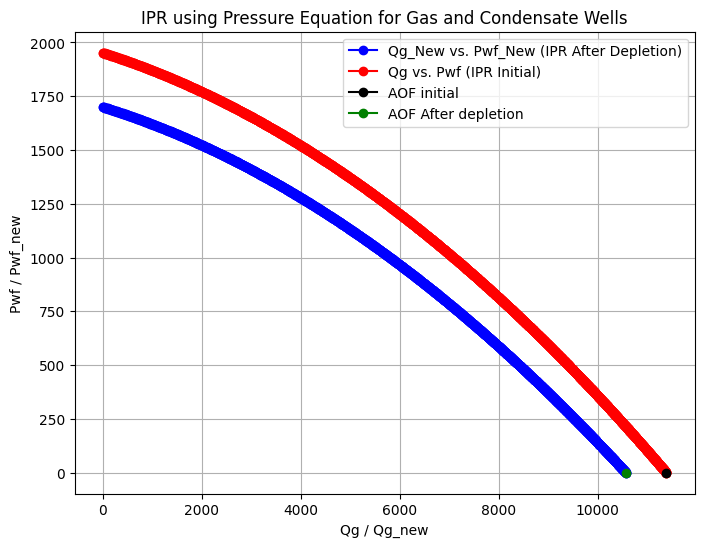

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math


# Given data
pr = 1952  # psi  Initial reservoir pressure
prf = 1700  # psi reservoir pressure after depletion  " f => final"
# Test data ( Get from DST, Drawdown Build up test....)
Pwf = np.array([1700, 1500, 1300])
Qg = np.array([2624.6, 4154.7, 5425.1])  # Exclusion of Qg = 0 is necessary to avoid this error invalid value encountered in divide result = (pr - Pwf) / Qg

# from PVT study (This data used when we generate the IPR data for the well when the reservoir pressure drops from 1952 to 1700 psi )
ug1_Bg1=0.01206 # at pr = 1952 psi   ug1 viscosity of gas and  Bg is the gas formation value factor
ug2_Bg2=0.01180 # at pr = 1700 psi  ug1 viscosity of gas and Bg is the gas formation value factor

# Calculate (pr - Pwf)/ Qg
result = (pr - Pwf) / Qg

# Assuming Qg is a list or array-like data
Cart_Qg = np.array(Qg)    # Cart => refers to a Cartesian plot.
Cart_result = np.array(result) # Cart => refers to a Cartesian plot.


# Perform linear regression on Cartesian scale
slope, intercept, r_value, p_value, std_err = linregress(Cart_Qg, Cart_result)

# to get the n and C
b1 = slope
a1 = intercept

# Generation of IPR PLOT for initial reservoir pressure

# Create an array of Pwf values from pr down to 0 for initial reservoir pressure pr =1952
Pwf_values = np.arange(pr, -1, -1)  # Start from pr and go down to 0

# Calculate Qg for each Pwf using the equation for initial reservoir pressure pr =1952



Qg_values = (-a1+np.sqrt(a1**2 + 4*b1*(pr - Pwf_values)))/(2*b1)


AOF =  (-a1+math.sqrt(a1**2 + 4*b1*pr))/(2*b1)  # Pwf_values**2 == 0 to get AOf (Absolute open flow)<=> Qo max at Pwf=Pr

# Futre IPR PLOT after depletion of reservoir pressure to prf=1700 psi
# Calculate a2 and b2 after depletion

a2=a1*( ug2_Bg2 / ug1_Bg1 ) # Prf = reservoir pressure after depletion

b2=b1*( ug2_Bg2 / ug1_Bg1 ) # Prf = reservoir pressure after depletion


Pwf_values_f = np.arange(prf, -1, -1)  # Start from prf and go down to 0
Qg_values_f = (-a2+np.sqrt(a2**2 + 4*b2*(prf - Pwf_values_f)))/(2*b2)

AOF_f = (-a2+np.math.sqrt(a2**2 + 4*b2*prf))/(2*b2) # Pwf_values_f **2 == 0 to get AOf after depletion


# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(Qg_values_f,Pwf_values_f , marker='o', linestyle='-', color='b', label='Qg_New vs. Pwf_New (IPR After Depletion)')
plt.plot(Qg_values,Pwf_values , marker='o', linestyle='-', color='r', label='Qg vs. Pwf (IPR Initial)')
plt.plot(AOF,0, color='black', marker='o', label='AOF initial')
plt.plot(AOF_f,0, color='g', marker ='o', label='AOF After depletion')

plt.grid(True)
plt.xlabel('Qg / Qg_new')
plt.ylabel('Pwf / Pwf_new')
plt.title('IPR using Pressure Equation for Gas and Condensate Wells')

plt.legend()
plt.show()
